In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
# 경고 메세지 안 보이게 

import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [2]:
import seaborn as sns
import pandas as pd 
import missingno as msno

In [3]:
criminal_data=pd.read_csv('data\criminal_data.csv',header=None)
len(criminal_data)

9953

In [4]:
criminal_data.columns = ['날짜','경찰서명','전체발생건수','남자피해자',
                         '여자피해자','성별불상피해자','피해자 연령(6세이하)',
                         '피해자 연령(12세이하)','피해자 연령(15세이하)',
                         '피해자 연령(20세이하)','피해자 연령(30세이하)',
                         '피해자 연령(40세이하)','피해자 연령(50세이하)',
                         '피해자 연령(60세이하)','피해자 연령(60세초과)',
                         '피해자 연령(미상)','범죄유형(강력범죄)',
                         '범죄유형(폭력범죄)','범죄유형(절도범죄)',
                         '범죄유형(지능범죄)','범죄유형(기타범죄)',
                         '수사단서정보(고발)','수사단서정보(고소)',
                         '수사단서정보(진정)','수사단서정보(탄원)',
                         '수사단서정보(피해자신고)','수사단서정보(타인신고)',
                         '수사단서정보(탐문정보)','수사단서정보(불심검문)',
                         '수사단서정보(자수)','수사단서정보(여죄)',
                         '수사단서정보(변사체)','수사단서정보(현행범)',
                         '수사단서정보(기타)','발생요일(일)',
                         '발생요일(월)','발생요일(화)','발생요일(수)',
                         '발생요일(목)','발생요일(금)','발생요일(토)'
]

In [5]:
criminal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   날짜             9953 non-null   int64 
 1   경찰서명           9953 non-null   object
 2   전체발생건수         9953 non-null   int64 
 3   남자피해자          9953 non-null   int64 
 4   여자피해자          9953 non-null   int64 
 5   성별불상피해자        9953 non-null   int64 
 6   피해자 연령(6세이하)   9953 non-null   int64 
 7   피해자 연령(12세이하)  9953 non-null   int64 
 8   피해자 연령(15세이하)  9953 non-null   int64 
 9   피해자 연령(20세이하)  9953 non-null   int64 
 10  피해자 연령(30세이하)  9953 non-null   int64 
 11  피해자 연령(40세이하)  9953 non-null   int64 
 12  피해자 연령(50세이하)  9953 non-null   int64 
 13  피해자 연령(60세이하)  9953 non-null   int64 
 14  피해자 연령(60세초과)  9953 non-null   int64 
 15  피해자 연령(미상)     9953 non-null   int64 
 16  범죄유형(강력범죄)     9953 non-null   int64 
 17  범죄유형(폭력범죄)     9953 non-null   int64 
 18  범죄유형(절도범죄)     9953 non-null

<AxesSubplot:>

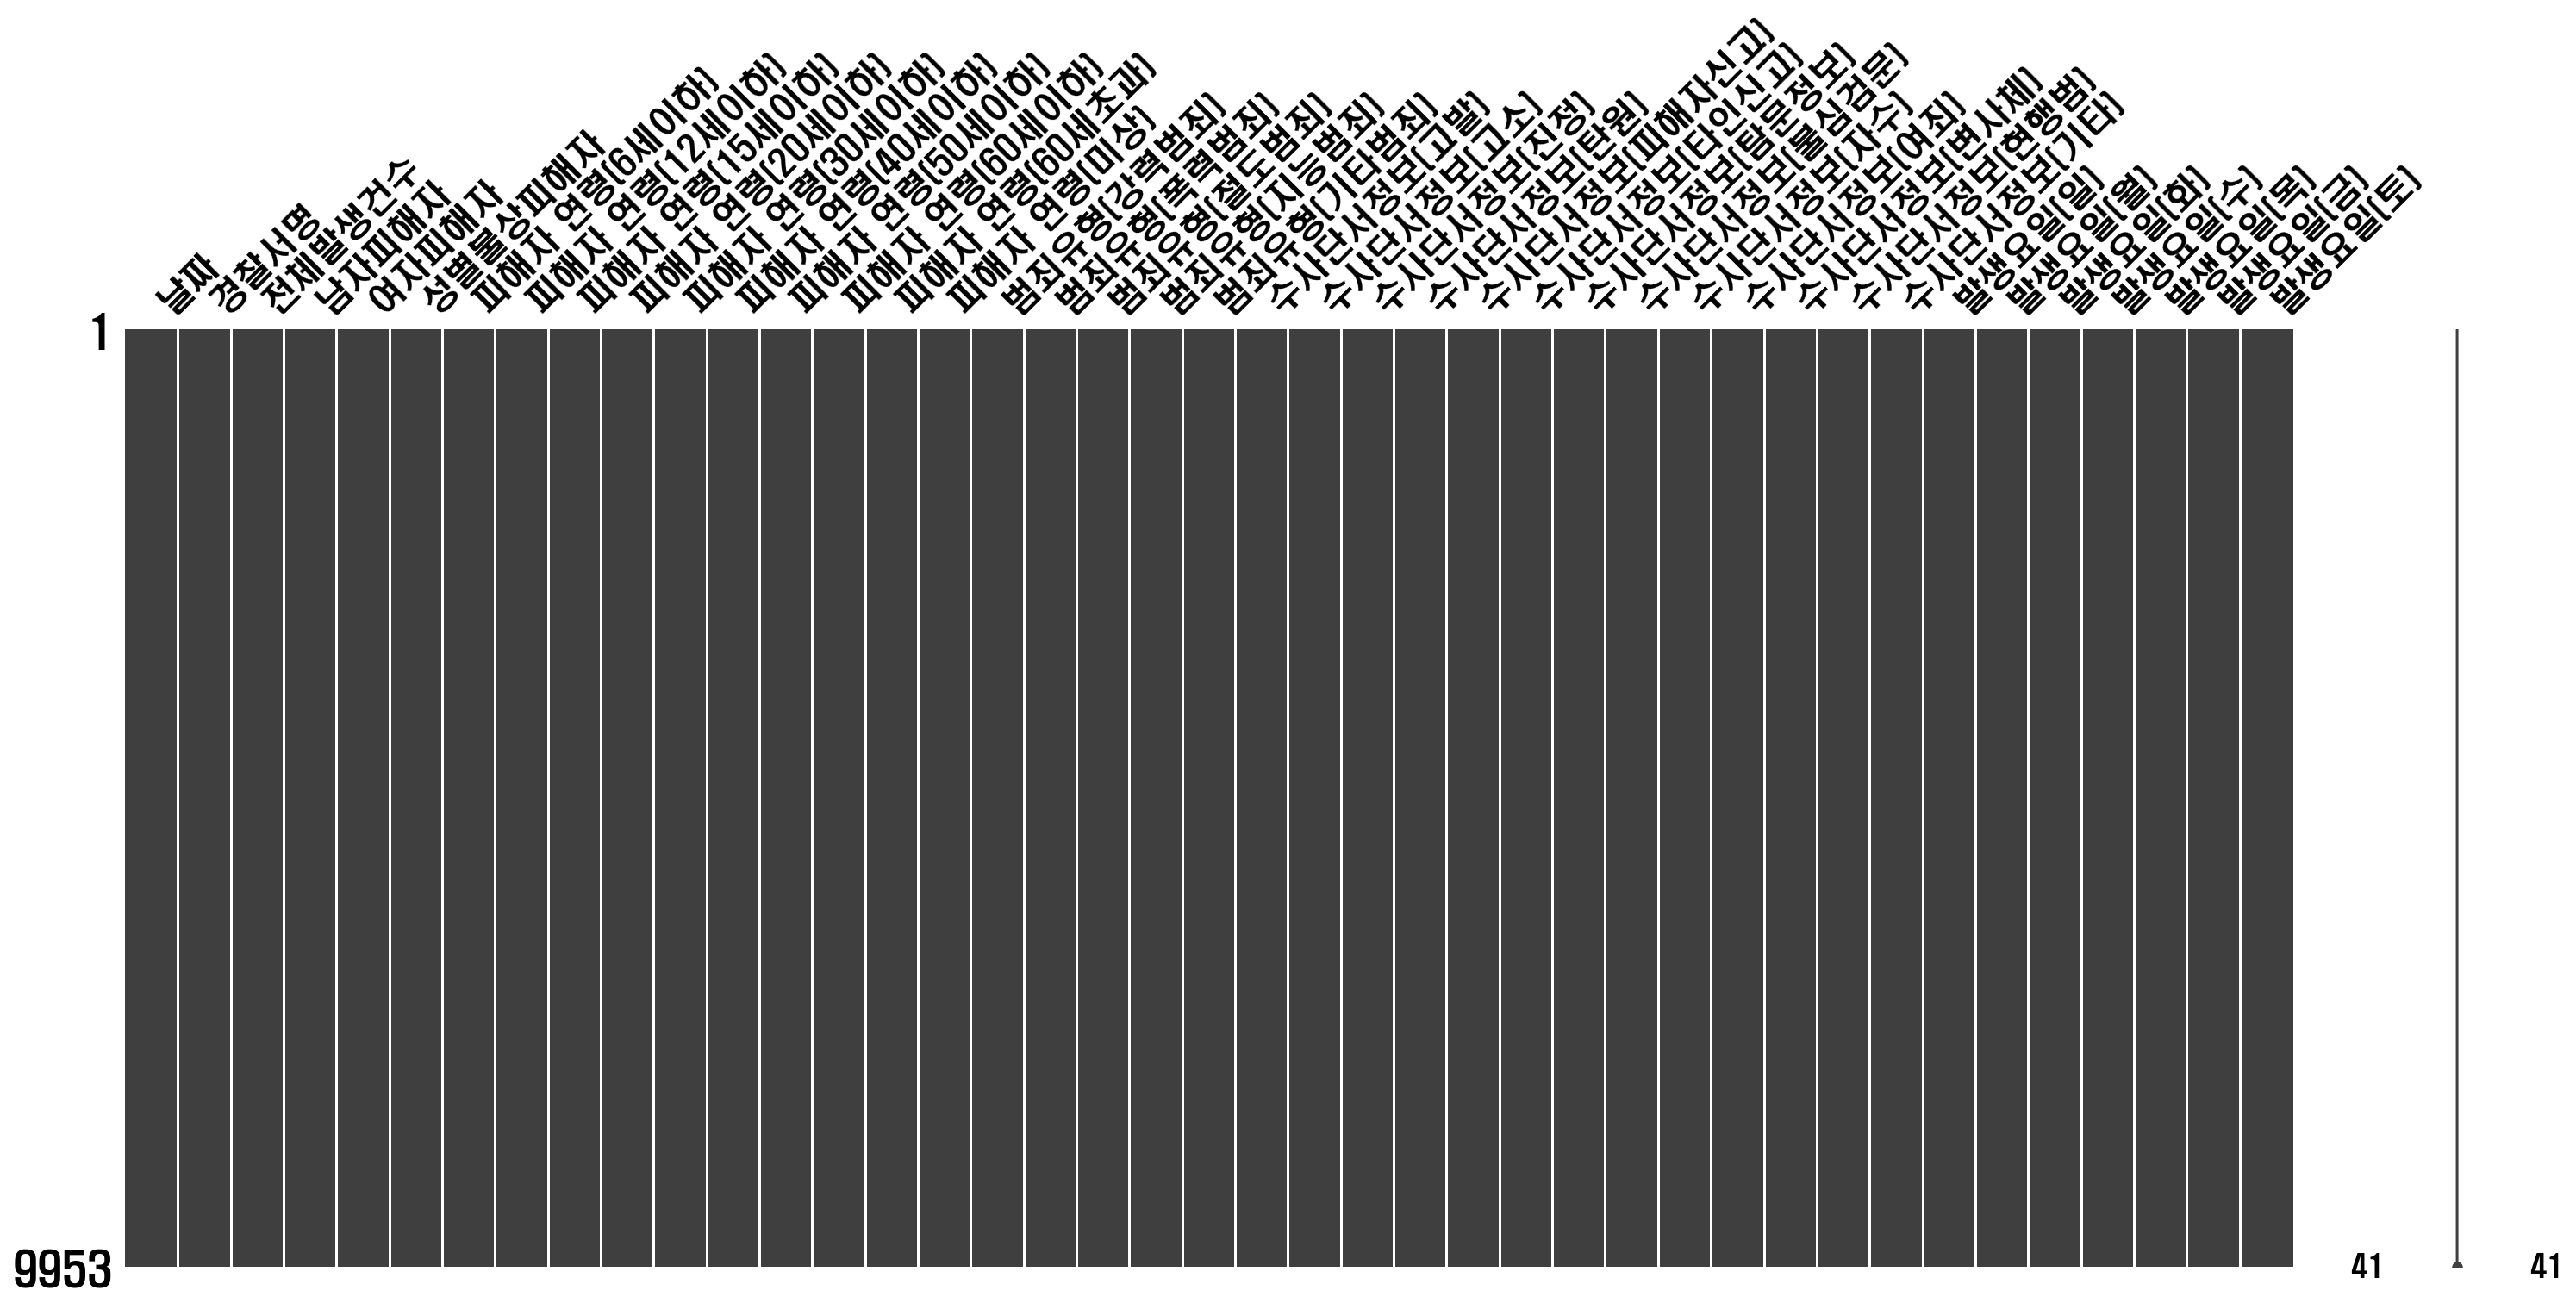

In [6]:
msno.matrix(criminal_data,fontsize=20)

In [7]:
need_data=criminal_data[['날짜','경찰서명','전체발생건수','범죄유형(강력범죄)','범죄유형(폭력범죄)','범죄유형(절도범죄)']]
need_data.info(), need_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   날짜          9953 non-null   int64 
 1   경찰서명        9953 non-null   object
 2   전체발생건수      9953 non-null   int64 
 3   범죄유형(강력범죄)  9953 non-null   int64 
 4   범죄유형(폭력범죄)  9953 non-null   int64 
 5   범죄유형(절도범죄)  9953 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 466.7+ KB


(None, (9953, 6))

<AxesSubplot:>

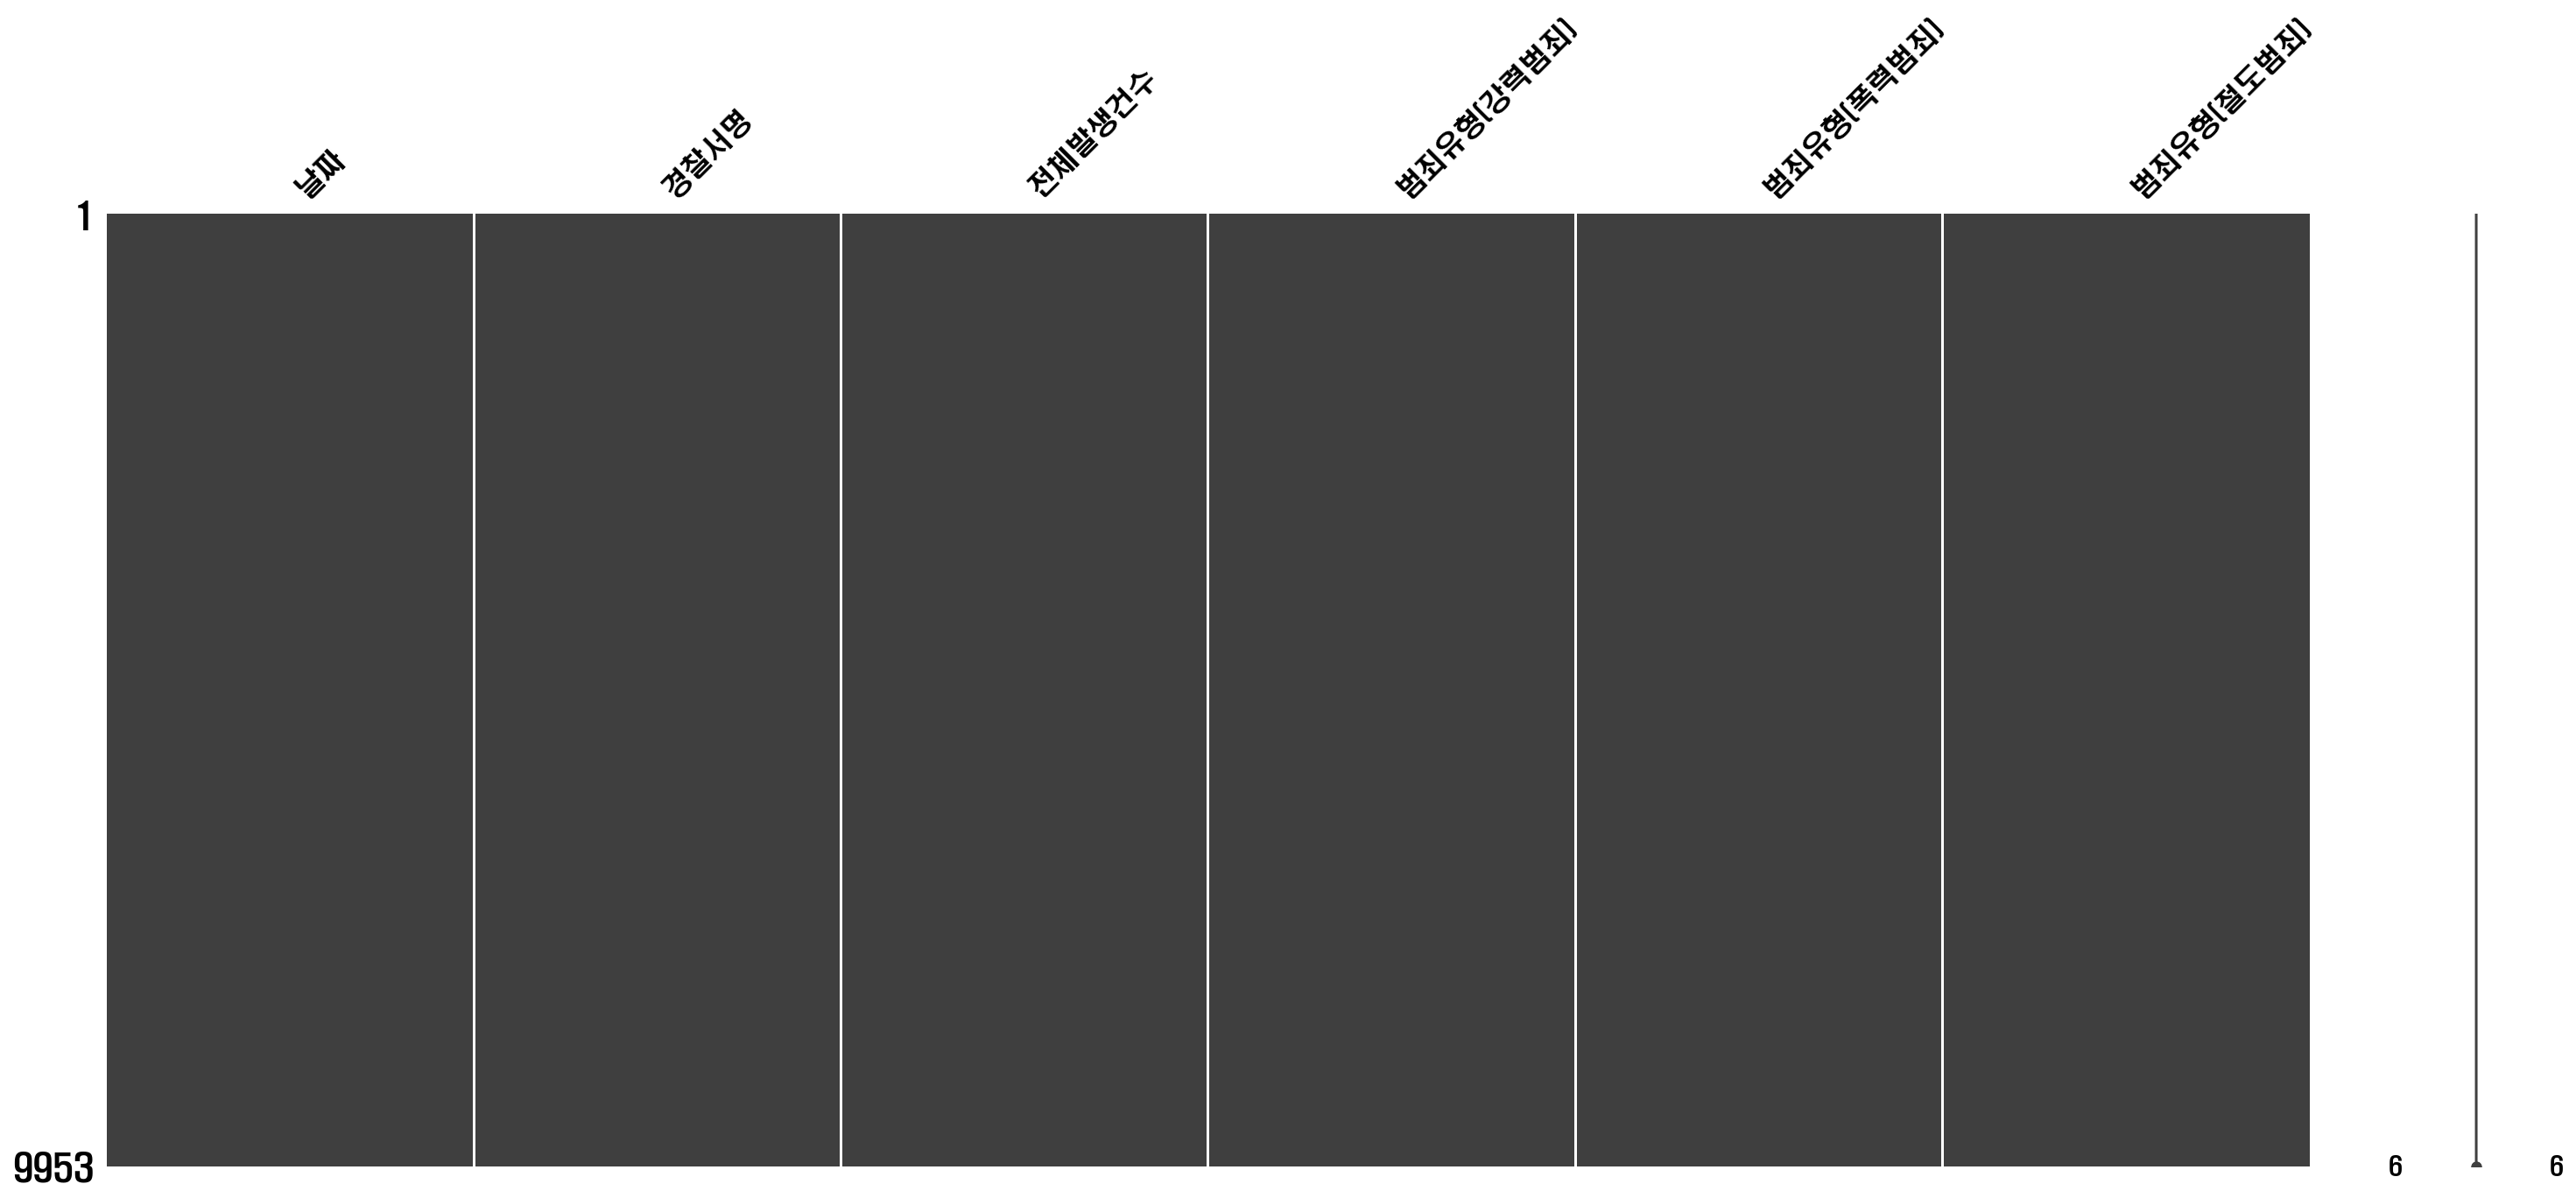

In [8]:
msno.matrix(need_data)

In [9]:
need_data['경찰서명'].replace('충남세종경찰서','세종경찰서',inplace=True)

In [10]:
practice=[]
for i in range(len(need_data['경찰서명'])):
    practice.append(need_data['경찰서명'][i][0:2])
need_data['지역명']=practice    

# 1.행정지역나누기

In [11]:
need_data.columns

Index(['날짜', '경찰서명', '전체발생건수', '범죄유형(강력범죄)', '범죄유형(폭력범죄)', '범죄유형(절도범죄)',
       '지역명'],
      dtype='object')

In [12]:
def area(x):
    if(x=='강원')or(x=='동해')or(x=='속초'):
        return '강원도'
    elif(x=='경기')or(x=='평택'):
        return '경기도'
    elif(x=='경남')or(x=='남해')or(x=='창원')or(x=='통영'):
        return '경상남도'
    elif(x=='경북')or(x=='울진')or(x=='포항'):
        return '경상북도'
    elif(x=='광주'):
        return '광주광역시'
    elif(x=='군산')or(x=='부안')or(x=='전북'):
        return'전라북도'
    elif(x=='목포')or(x=='서해')or(x=='여수')or(x=='완도')or(x=='전남'):
        return'전라남도'
    elif(x=='대구'):
        return'대구광역시'
    elif(x=='대전'):
        return'대전광역시'
    elif(x=='보령')or(x=='충남')or(x=='태안'):
        return'충청남도'
    elif(x=='부산'):
        return'부산광역시'
    elif(x=='서귀')or(x=='제주'):
        return'제주특별자치도'
    elif(x=='서울'):
        return'서울특별시'
    elif(x=='울산'):
        return'울산광역시'
    elif(x=='인천')or(x=='중부'):
        return'인천광역시'
    elif(x=='충북'):
        return'충청북도'
    elif(x=='해양')or(x=='세종'):
        return'세종특별자치시'
need_data['행정구역']=need_data['지역명'].apply(area)

In [13]:
#서해는 '서해해양경비안전본부'라는것을 확인  목포에 있습니다
a=[]
for i in range(len(need_data['경찰서명'])):
    if need_data['경찰서명'][i][0:2]=='완도':
        a.append(need_data['경찰서명'][i])
set(a)

{'완도해양경비안전서'}

In [14]:
need_data['연도'] = need_data['날짜'].apply(lambda x: str(x)[0:4])
need_data['월'] = need_data['날짜'].apply(lambda x: int(str(x)[4:6]))

In [15]:
need_data2017=need_data.loc[need_data['연도']=='2017']
need_data2018=need_data.loc[need_data['연도']=='2018']
need_data2019=need_data.loc[need_data['연도']=='2019']

# 행정구역 지역인구수

In [16]:
administrative=pd.read_excel('data\행정구역_시군구_별__성별_인구수_20210416120730.xlsx',index_col=0)
administrative.info(),administrative.shape

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울특별시 to 제주특별자치도
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총       17 non-null     int64
 1   남자      17 non-null     int64
 2   여자      17 non-null     int64
dtypes: int64(3)
memory usage: 544.0+ bytes


(None, (17, 3))

# 범죄유형(강력범죄,폭력범죄,절도범죄)합

## 2017년도

In [17]:
need_data2017['강력_폭력_절도합']=need_data2017['범죄유형(강력범죄)']+\
                        need_data2017['범죄유형(폭력범죄)']+need_data2017['범죄유형(절도범죄)']

need_data2017[['행정구역','강력_폭력_절도합']].groupby('행정구역').sum()
data_2017=pd.concat([need_data2017[['행정구역','강력_폭력_절도합']].groupby('행정구역').sum(),
                                         administrative[['총']]],axis=1)

data_2017['총']=data_2017['총'].apply(lambda x : round(x/10000))
data_2017['1만명당 사건발생횟수']=data_2017['강력_폭력_절도합']/data_2017['총']
data_2017.head(3)

,강력_폭력_절도합,총,1만명당 사건발생횟수
강원도,16252,154,105.532468
경기도,119147,1324,89.990181
경상남도,29084,336,86.559524


## 2018년도

In [18]:
need_data2018['강력_폭력_절도합']=need_data2018['범죄유형(강력범죄)']+need_data2018['범죄유형(폭력범죄)']+need_data2018['범죄유형(절도범죄)']
need_data2018[['행정구역','강력_폭력_절도합']].groupby('행정구역').sum()
data_2018=pd.concat([need_data2018[['행정구역','강력_폭력_절도합']].groupby('행정구역').sum(),administrative[['총']]],axis=1)
data_2018['총']=data_2018['총'].apply(lambda x : round(x/10000))
data_2018['1만명당 사건발생횟수']=data_2018['강력_폭력_절도합']/data_2018['총']
data_2018.head(3)

,강력_폭력_절도합,총,1만명당 사건발생횟수
강원도,14127,154,91.733766
경기도,119285,1324,90.094411
경상남도,28476,336,84.750000


## 2019년도

In [19]:
need_data2019['강력_폭력_절도합']=need_data2019['범죄유형(강력범죄)']+\
        need_data2019['범죄유형(폭력범죄)']+need_data2019['범죄유형(절도범죄)']

need_data2019[['행정구역','강력_폭력_절도합']].groupby('행정구역').sum()
data_2019=pd.concat([need_data2019[['행정구역','강력_폭력_절도합']].groupby('행정구역').sum(),
                     administrative[['총']]],axis=1)

data_2019['총']=data_2019['총'].apply(lambda x : round(x/10000))
data_2019['1만명당 사건발생횟수']=data_2019['강력_폭력_절도합']/data_2019['총']
data_2019.head(3)

,강력_폭력_절도합,총,1만명당 사건발생횟수
강원도,13925,154,90.422078
경기도,121366,1324,91.666163
경상남도,29857,336,88.860119


# 범죄(2017,2018,2019)년도별

In [20]:
data=pd.concat([data_2017,data_2018,data_2019],axis=1)
occurrence_year=data['1만명당 사건발생횟수']
occurrence_year.columns=['2017_1만명당_사건발생횟수','2018_1만명당_사건발생횟수','2019_1만명당_사건발생횟수']
occurrence_year=occurrence_year.apply(lambda x:round(x,2))
occurrence_year.head(3)

,2017_1만명당_사건발생횟수,2018_1만명당_사건발생횟수,2019_1만명당_사건발생횟수
강원도,105.53,91.73,90.42
경기도,89.99,90.09,91.67
경상남도,86.56,84.75,88.86


## 2019년 기준 데이터 정렬

In [21]:
c=occurrence_year.copy()
c.sort_values(by='2019_1만명당_사건발생횟수',ascending=False)

,2017_1만명당_사건발생횟수,2018_1만명당_사건발생횟수,2019_1만명당_사건발생횟수
제주특별자치도,133.34,131.07,132.12
부산광역시,111.99,105.93,108.22
서울특별시,110.96,104.90,106.72
인천광역시,102.80,102.75,106.39
대전광역시,107.51,105.84,101.00
광주광역시,95.62,94.92,98.30
대구광역시,94.08,92.86,97.20
충청북도,90.79,89.86,93.03
충청남도,93.26,94.92,91.88
경기도,89.99,90.09,91.67


## 엑셀로 출력

In [22]:
occurrence_year.to_excel("data/년도별.범죄.xlsx")

# 지도 시각화

## 엑셀 출력

In [23]:
latitude_longitude=pd.read_excel('data\위도경도.xlsx',index_col=0)
data_2019['행정구역']=data_2019.index
data_2019.head(3)

,강력_폭력_절도합,총,1만명당 사건발생횟수,행정구역
강원도,13925,154,90.422078,강원도
경기도,121366,1324,91.666163,경기도
경상남도,29857,336,88.860119,경상남도


In [24]:
visualization_2019=pd.concat([data_2019,latitude_longitude],axis=1)

In [25]:
visualization_2019.to_excel('data/2019년도범죄.xlsx')

## 지도시각화

In [1]:
import folium
from folium import plugins
visualization_2019=visualization_2019.reset_index()
visualization_2019.head(3)
visualization_2019['1만명당 사건발생횟수']=visualization_2019['1만명당 사건발생횟수'].apply(lambda x: round(x,2))

geo_json ='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json'

regional_data = visualization_2019[['위도',' 경도']]
m=folium.Map(
    location=['36.3643980718602','127.382880272308'],
    tiles='OpenStreetMap',#'Stamen Terrain'
    zoom_start=7
) 
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=visualization_2019,
    columns=['행정구역','1만명당 사건발생횟수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.5,
).add_to(m)

plugins.Fullscreen(position='topright',
                  title='Click to Expand',
                  title_cancel='Click to Exit',
                  force_seperate_button=True).add_to(m)

for i in range(len(visualization_2019['행정구역'])):
    lat= visualization_2019.loc[i,'위도']
    long= visualization_2019.loc[i,' 경도']
    tooltip = '<h4>'+visualization_2019.loc[i, '행정구역']+'<h4>'+'\n'+\
        '※1만명당 사건 발생횟수'+':'+ str(visualization_2019.loc[i,'1만명당 사건발생횟수'])+'건'+'\n'+'<br>'+\
        '※사건 발생 횟수'+':'+str(visualization_2019.loc[i,'강력_폭력_절도합'])+'회'
    
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)

m


NameError: name 'visualization_2019' is not defined

# 그래프 시각화

In [27]:
oy=occurrence_year.copy()
oy.index=['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']
oy_2019=oy[['2019_1만명당_사건발생횟수']]
oy_2019['광역 자치별']=oy_2019.index
oy_2018=oy[['2018_1만명당_사건발생횟수']]
oy_2018['광역 자치별']=oy_2018.index
oy_2017=oy[['2017_1만명당_사건발생횟수']]
oy_2017['광역 자치별']=oy_2017.index

Text(0.5, 0, '2017년도 1만명당 사건발행횟수(건)')

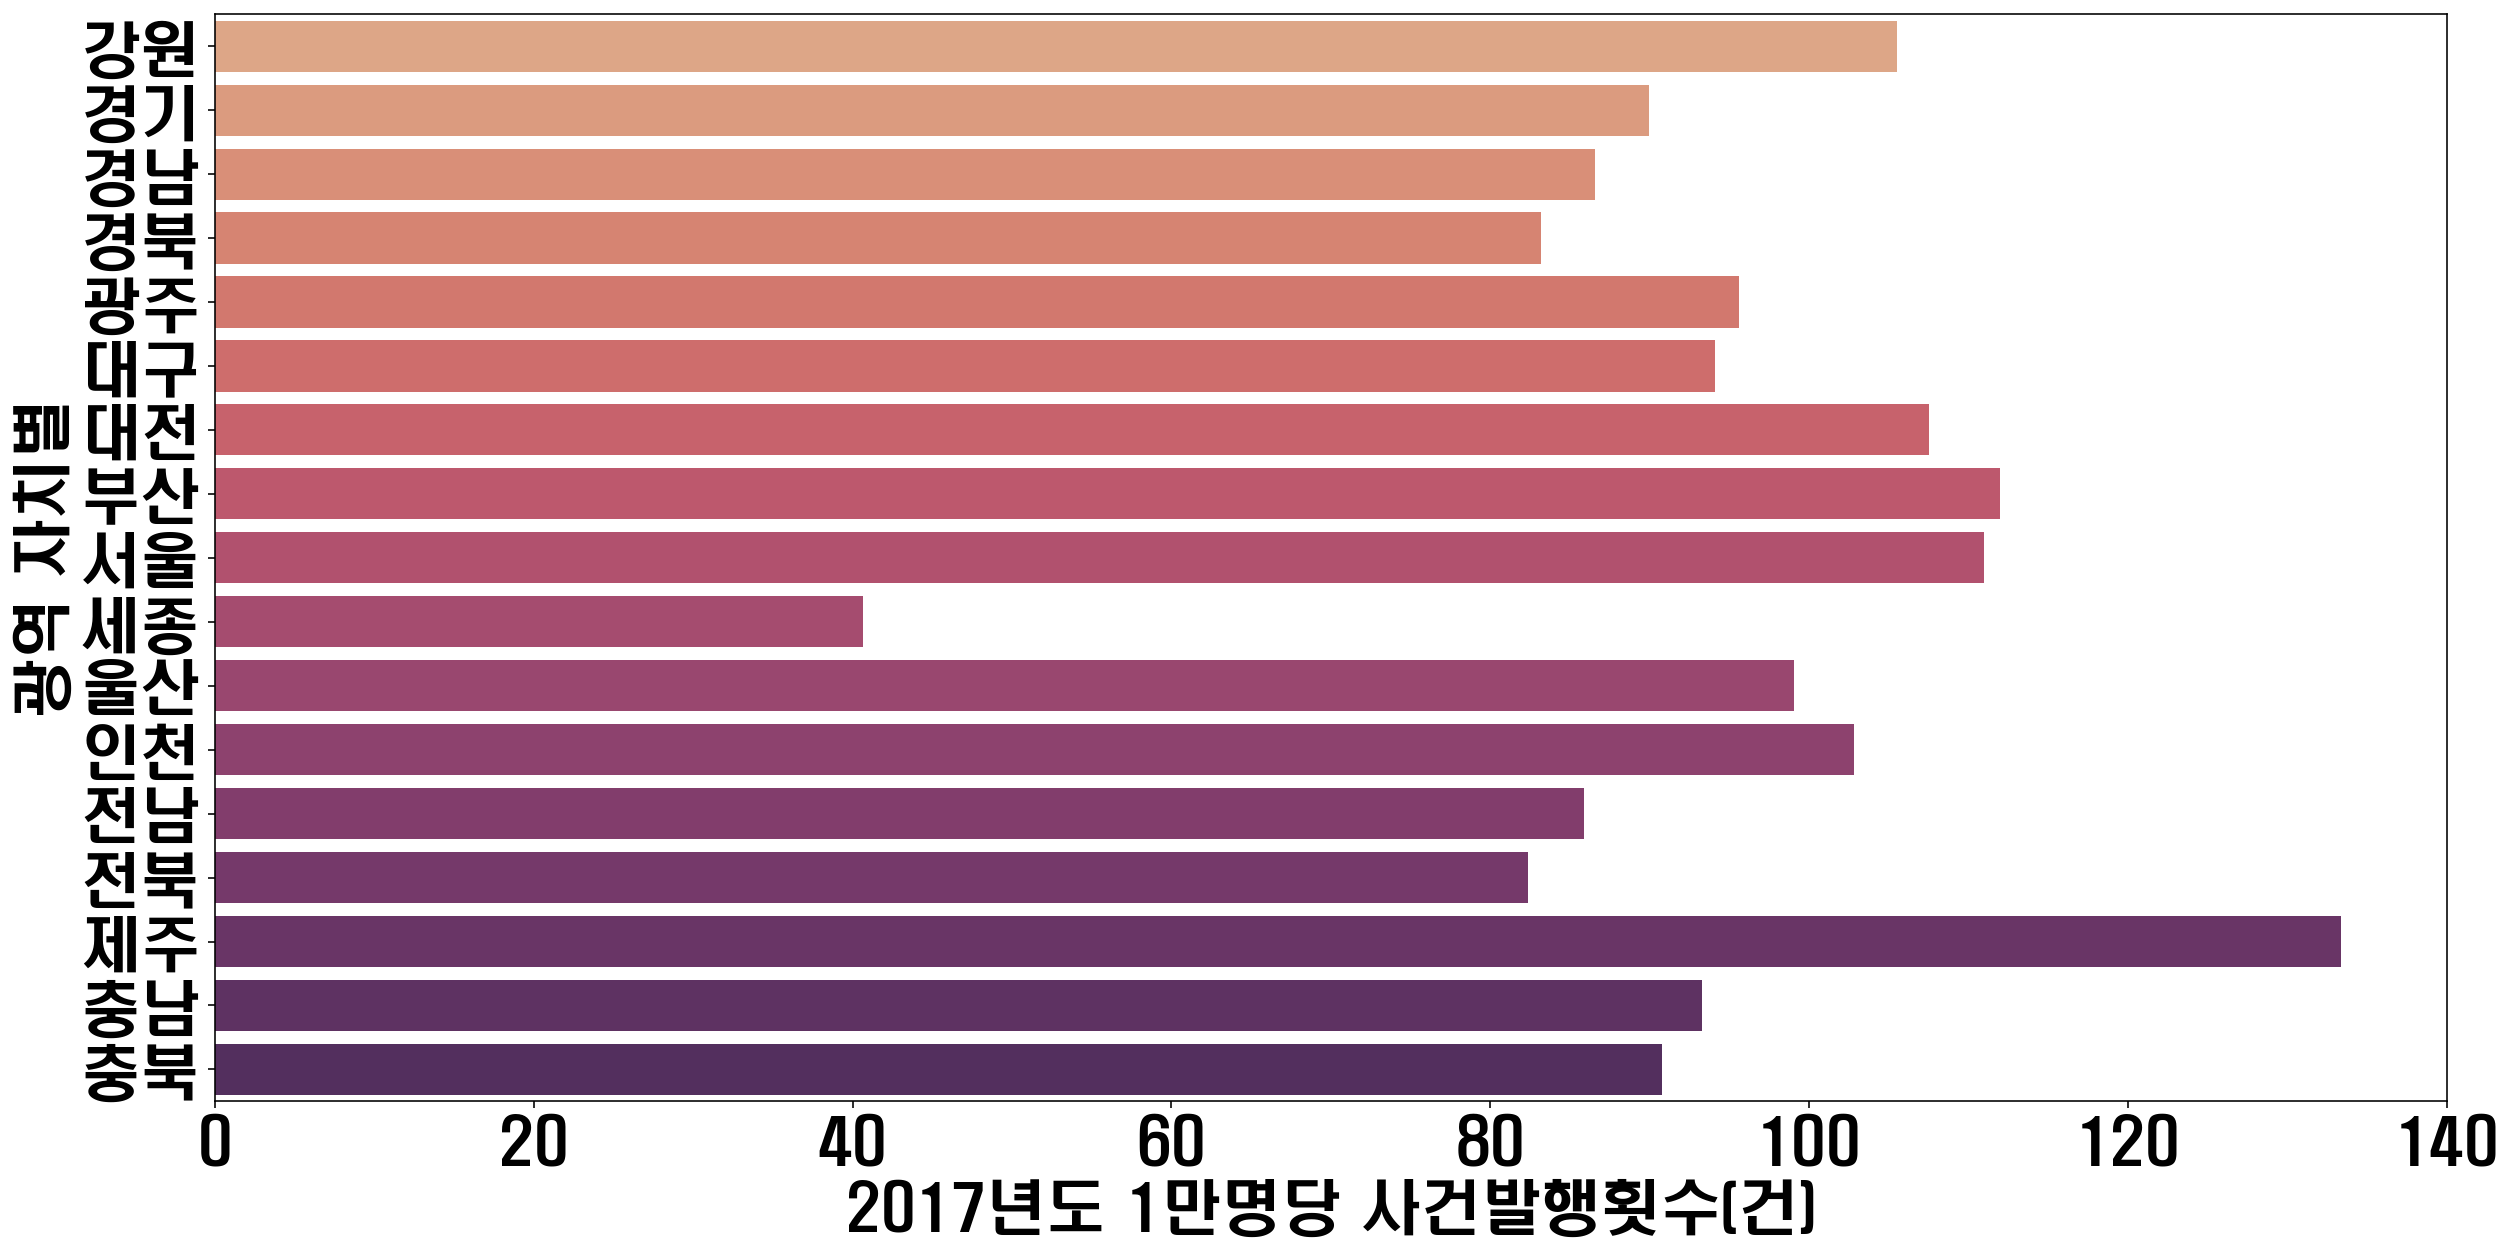

In [28]:
plt.rc('font', size=30)
plt.figure(figsize=(20,10))
plt.rc("font", family="HYHeadLine-Medium")
ax=sns.barplot(y=oy_2017['광역 자치별'] ,x=oy_2017['2017_1만명당_사건발생횟수'],data=oy_2017,
               palette='flare')
ax.set_xlabel('2017년도 1만명당 사건발행횟수(건)')


# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=50)

Text(0.5, 0, '2018년도 1만명당 사건발행횟수(건)')

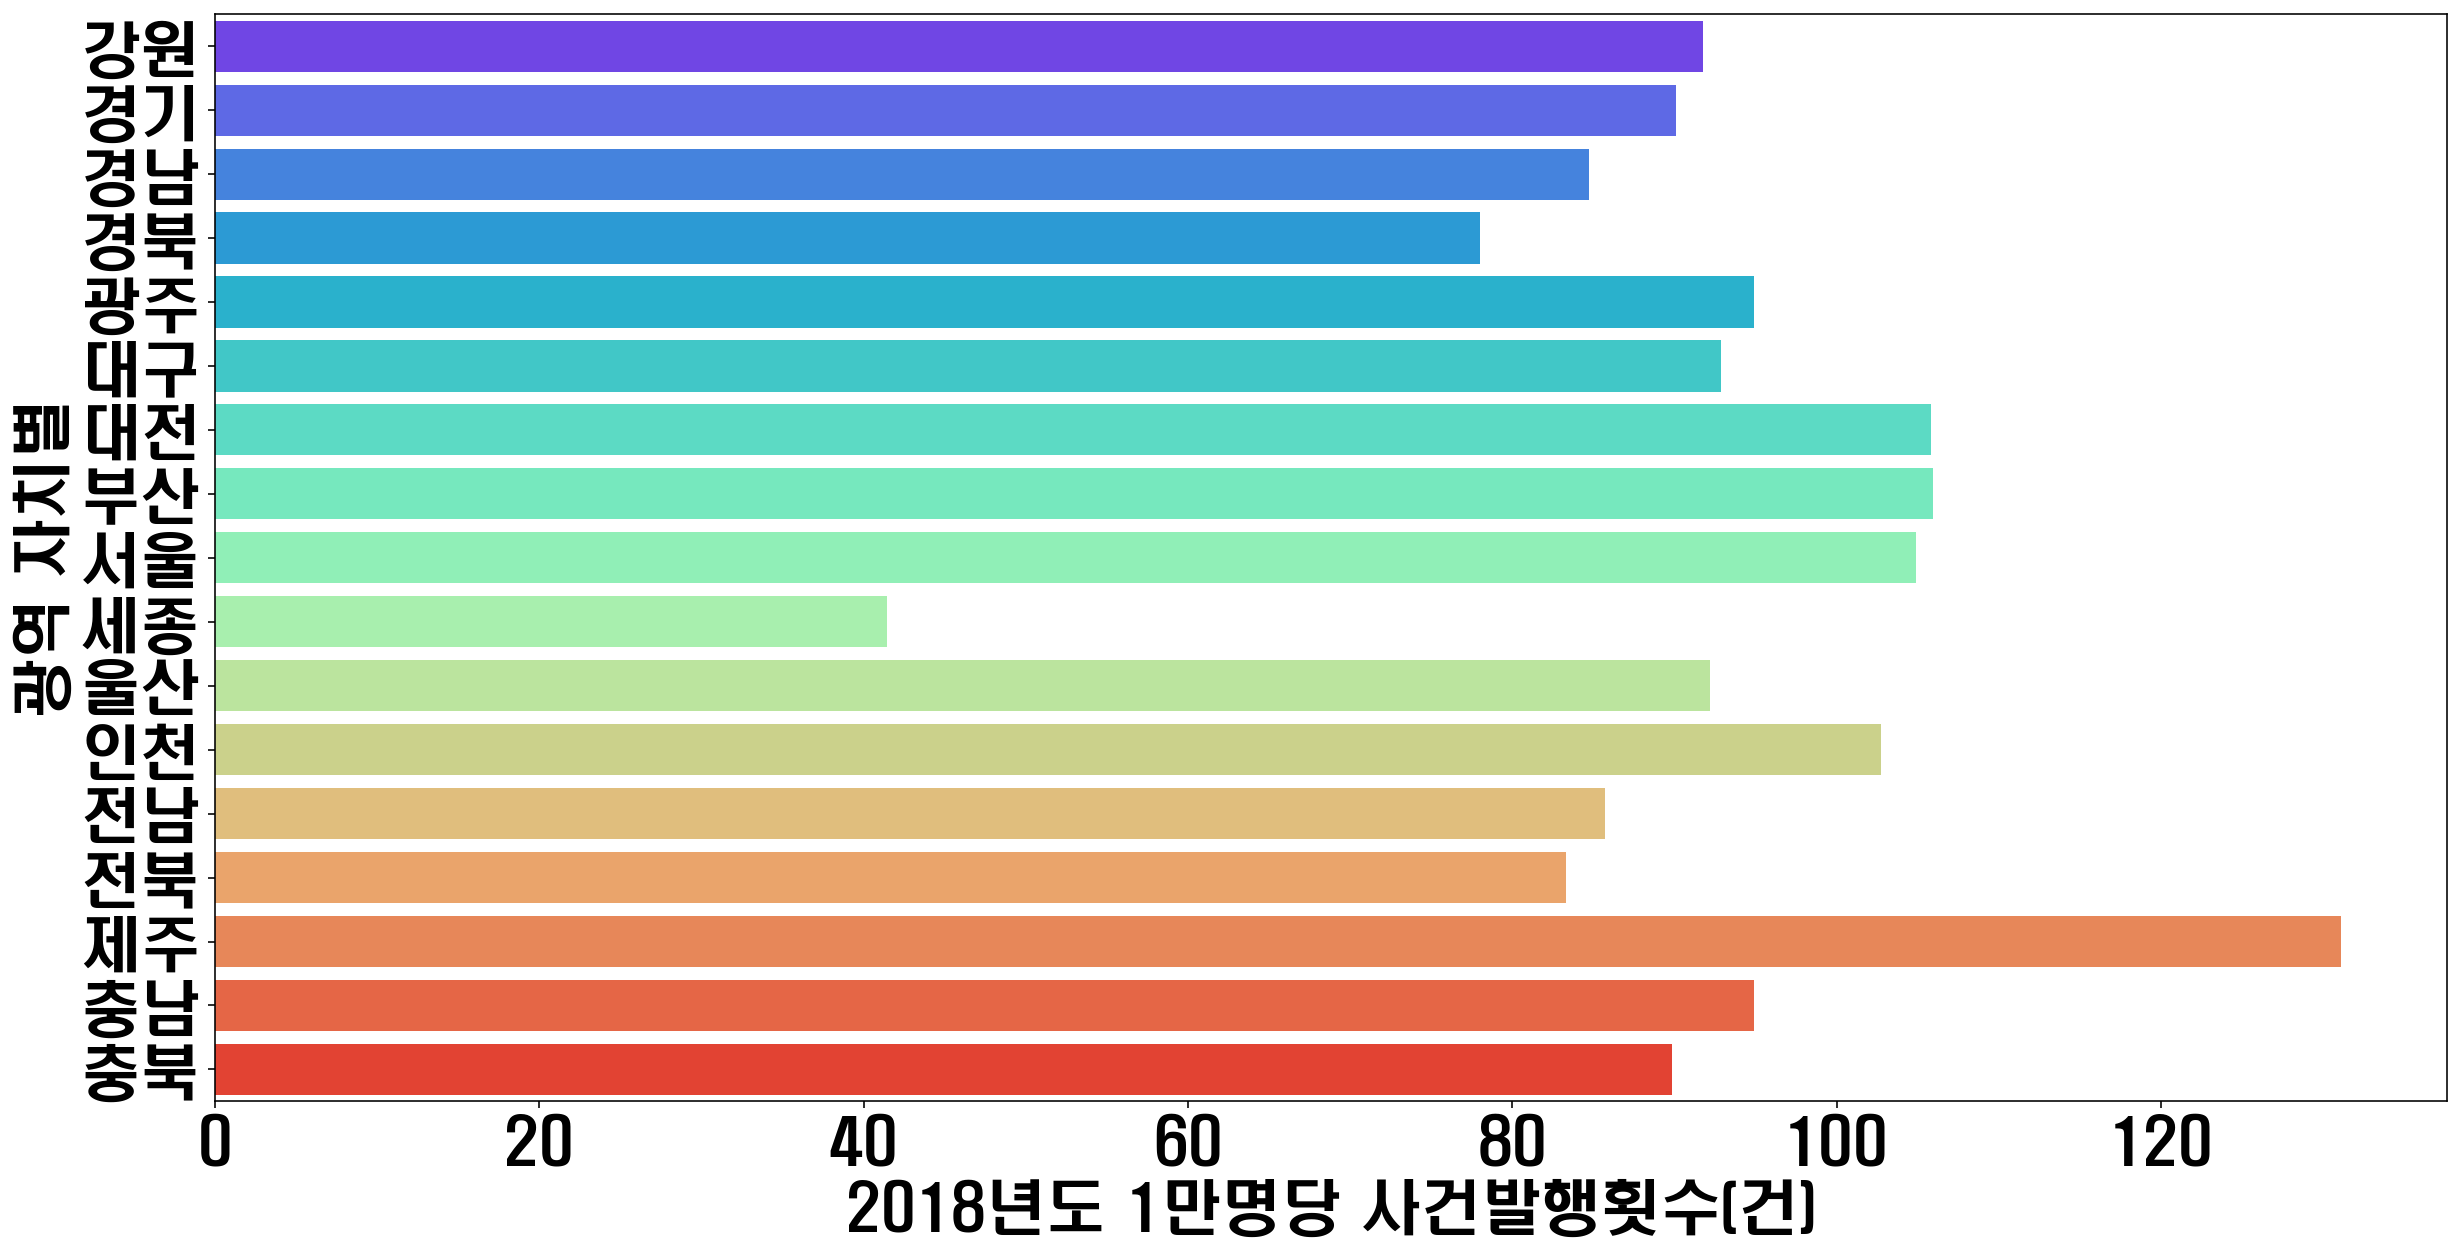

In [29]:
plt.rc('font', size=30)
plt.figure(figsize=(20,10))
ax=sns.barplot(y=oy_2018['광역 자치별'] ,x=oy_2018['2018_1만명당_사건발생횟수'],data=oy_2018,
               palette='rainbow')
ax.set_xlabel('2018년도 1만명당 사건발행횟수(건)')

Text(0.5, 0, '2019년도 1만명당 사건발행횟수(건)')

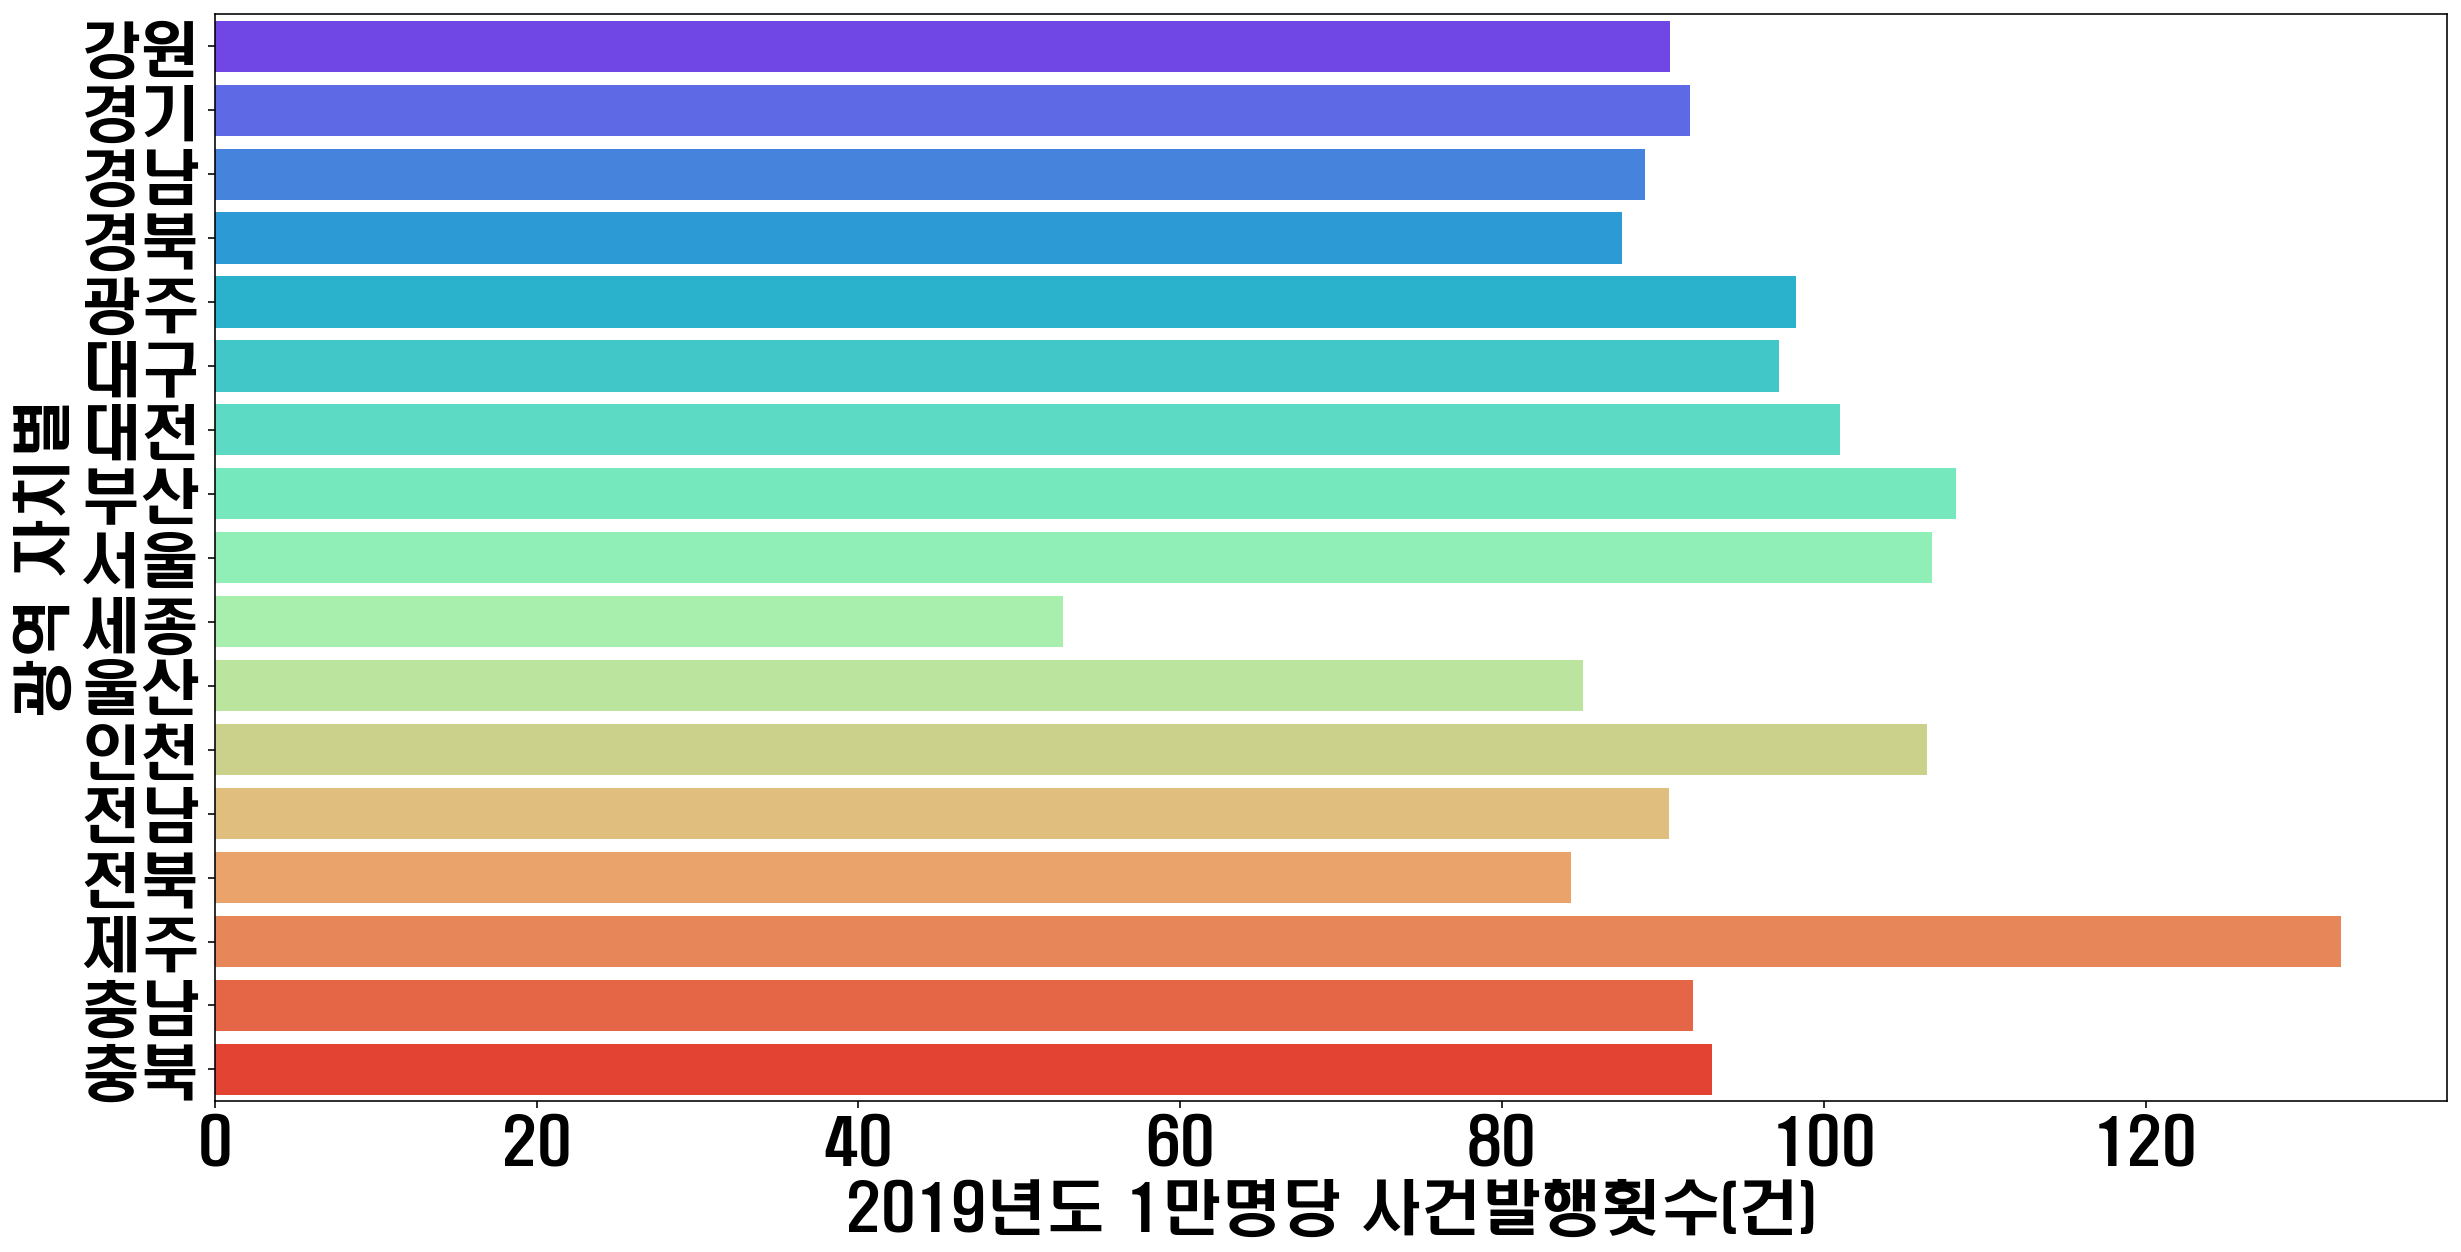

In [30]:
plt.rc('font', size=30)
plt.figure(figsize=(20,10))
ax=sns.barplot(y=oy_2019['광역 자치별'] ,x=oy_2019['2019_1만명당_사건발생횟수'],data=oy_2019,
               palette='rainbow') #spring
ax.set_xlabel('2019년도 1만명당 사건발행횟수(건)')
